In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Load MINIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

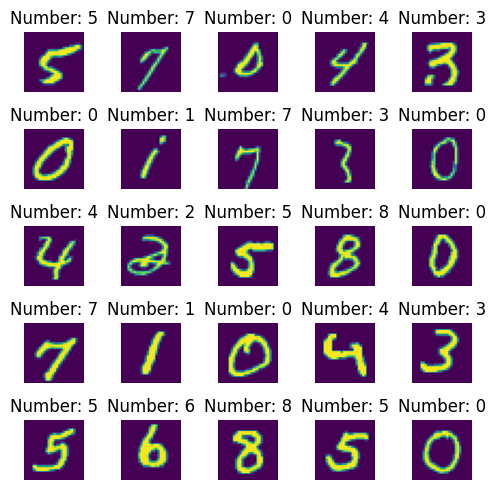

In [43]:
# Random Image from Trainset
def imshow(img):
    npimg = img.numpy()
    return np.transpose(npimg, (1, 2, 0))

dataiter = iter(train_loader)
data, target = next(dataiter)

fig, axes = plt.subplots(5, 5, figsize=(5, 5))

for i, ax in enumerate(axes.flat):
    img = imshow(data[i])
    ax.imshow(img)
    ax.set_title(f"Number: {target[i].item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [44]:
# Define LeNet Model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  
        self.tanh1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.tanh2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2, 2)  
        self.conv3 = nn.Conv2d(16, 120, 4)  
        self.tanh3 = nn.Tanh()
        self.fc1 = nn.Linear(120, 84)  
        self.tanh4 = nn.Tanh()
        self.fc2 = nn.Linear(84, 10) 
        self.softmax = nn.Softmax(dim=1)  
      
    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.tanh2(x)
        x = self.pool2(x)
        x = self.conv3(x)  
        x = self.tanh3(x)
        x = x.view(x.shape[0], -1)  
        x = self.fc1(x)
        x = self.tanh4(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [45]:
# Initiate Model, Loss function, and Optimizer
model = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [46]:
# Train
num_epochs = 10

train_loss = []
train_accuracy = []

for epoch in range(num_epochs):
    model.train()
    loss_sum = 0.0
    correct = 0
    total = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()
        _, predicted = torch.max(outputs.data, 1) 
        total += target.size(0) 
        correct += (predicted == target).sum().item()
        accuracy = 100 * correct / total 
        
    train_loss.append(loss_sum)
    train_accuracy.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss_sum/len(train_loader):.4f}, accuracy: {accuracy}')

Epoch [1/10], Loss: 1.5554, accuracy: 92.48666666666666
Epoch [2/10], Loss: 1.4887, accuracy: 97.46833333333333
Epoch [3/10], Loss: 1.4816, accuracy: 98.11666666666666
Epoch [4/10], Loss: 1.4772, accuracy: 98.515
Epoch [5/10], Loss: 1.4752, accuracy: 98.69166666666666
Epoch [6/10], Loss: 1.4738, accuracy: 98.83166666666666
Epoch [7/10], Loss: 1.4717, accuracy: 99.01833333333333
Epoch [8/10], Loss: 1.4714, accuracy: 99.03833333333333
Epoch [9/10], Loss: 1.4709, accuracy: 99.08166666666666
Epoch [10/10], Loss: 1.4699, accuracy: 99.18166666666667


In [49]:
#Test
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 98.66%


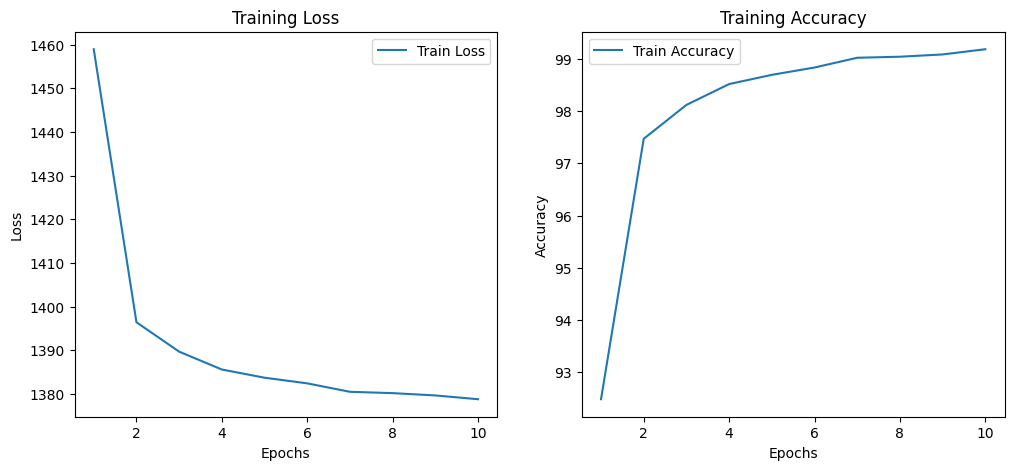

In [48]:
# Loss and Accuracy Plot

epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()